In [ ]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 19.1MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/ads.csv")

In [ ]:
df.columns.tolist()

['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']

In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


The target column in this dataframe is "sales," while the remaining columns serve as independent features.


In [ ]:
df.shape

(200, 5)

## Detecting Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#checking if there's any missing data
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No missing data detected.

# Algorithm: Linear Regression

It appears that the "unnamed" column serves as the index and does not have any impact on the target column. Hence, we can safely remove this column from the dataframe.

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The df.corr() function is used to compute the pairwise correlation between columns of a pandas DataFrame df. It calculates the correlation coefficients, which measure the strength and direction of the linear relationship between two variables.

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


It suggests that there is a positive correlation between the "TV" and "sales" columns (0.782224), a moderate positive correlation between the "radio" and "sales" columns (0.576223), and a weaker positive correlation between the "newspaper" and "sales" columns (0.228299).

<Axes: >

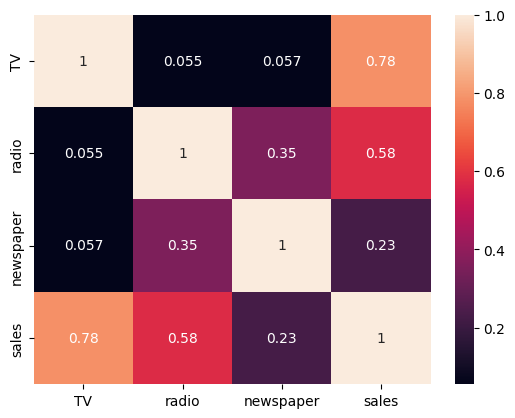

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

# Types of Variables
* The dependent variable, or the target variable, is "sales." It is the column located in the last row and the last column.

* The independent variables, or the features, are "TV," "radio," and "newspaper." These are the columns located in the first three rows and the first three columns.

* In this correlation matrix, the dependent variable "sales" is being correlated with the independent variables "TV," "radio," and "newspaper" to understand their relationships and the strength of their correlations. The correlation coefficients represent the degree and direction of the linear relationship between each independent variable and the dependent variable.

* By setting a correlation threshold of 0.5, we observe that "TV" has a correlation coefficient of 0.782224, which exceeds the threshold, indicating a strong correlation. Therefore, "TV" is selected as the most relevant feature for predicting or analyzing the "sales" variable.


In [ ]:
X = df[["TV"]]
y = df.sales

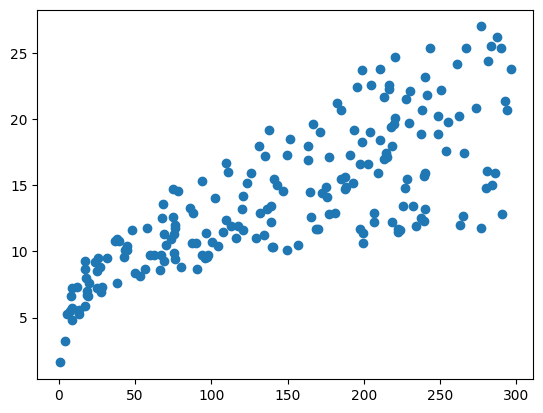

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = X, y = y)

#Splitting the data into Training Data and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
X.shape

(200, 1)

In [ ]:
X_train.shape

(140, 1)

In [ ]:
X_test.shape

(60, 1)

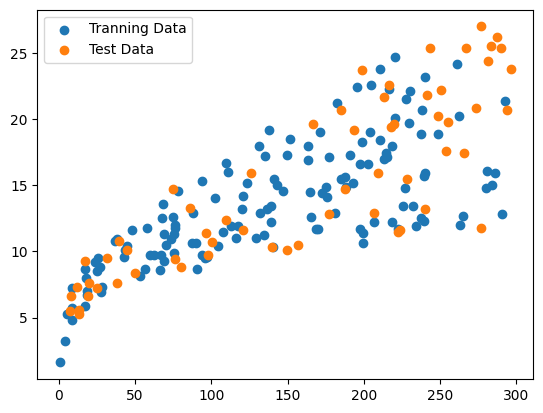

In [ ]:
plt.scatter(x = X_train, y = y_train, label ="Tranning Data")
plt.scatter(x = X_test, y = y_test, label = "Test Data")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test, y_prediction)
MAE = mean_absolute_error(y_test, y_prediction)

In [ ]:
print("The MSE is:" ,MSE)
print("The MAE is: " ,MAE)

The MSE is: 13.91582155143219
The MAE is:  3.06740879341507


In [ ]:
m = model.coef_
c = model.intercept_

In [ ]:
print(m)

[0.04152051]


In [ ]:
print(c)

7.69795401785074


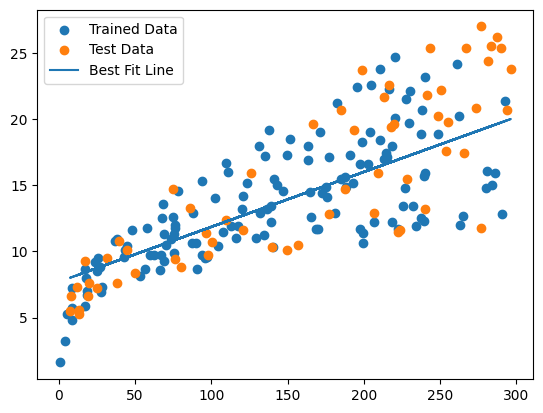

In [ ]:
plt.scatter(x = X_train, y = y_train, label='Trained Data')
plt.scatter(x = X_test, y = y_test, label= 'Test Data')
plt.plot(X_test, y_prediction, label='Best Fit Line')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.6582557625591752

In [ ]:
model.predict([[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.85000497])

# Multiple Feature

In [ ]:
X = df[['TV', 'radio', 'newspaper']]
y = df[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_test, y_prediction)

42.724046472435546

In [ ]:
mean_absolute_error(y_test, y_prediction)

5.175036544957799

In [ ]:
TV = 259
radio = 500
newspaper = 560
sales = model2.predict([[TV, radio, newspaper]])
sales

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[110.73388633]])